In [1]:
import tensorflow as tf

2024-03-28 15:36:29.329550: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Since this is a Feedforward NN, we use Sequential
from tensorflow.keras.models import Sequential

# By using flatten, we can convert a 2D structure to a 1D structure. Also, dense is used for hidden layers.
from tensorflow.keras.layers import Flatten, Dense

## Dataset Exploration

In [3]:
# cifar10 is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
cif_data = tf.keras.datasets.cifar10

In [4]:
dir(cif_data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [5]:
# This tells us load_data is a function, so to use it, we need brackets.
cif_data.load_data

<function keras.datasets.cifar10.load_data()>

In [6]:
# a is the training dataset and b is the test dataset.
a,b = cif_data.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [7]:
# The training dataset has 50,000 records of 32x32 images. The 3 at the end tells us this is a color image (the 3 layers RGB)
a[0].shape

(50000, 32, 32, 3)

In [10]:
a[1].shape

(50000, 1)

In [11]:
# Since this is the training data, let's rename it.
train = a

In [12]:
b[0].shape

(10000, 32, 32, 3)

In [13]:
b[1].shape

(10000, 1)

In [14]:
test = b

In [15]:
train_x = train[0]
train_y = train[1]

test_x = test[0]
test_y = test[1]

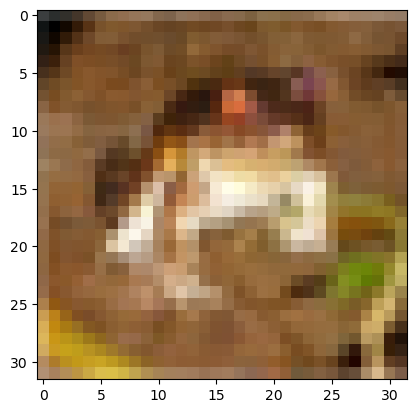

In [16]:
import matplotlib.pyplot as plt

# imshow is a function that converts any numerical data into a viewable image.
plt.imshow(train_x[0],cmap='gray')

In [17]:
# [6] is all frogs.
train_y[0]

array([6], dtype=uint8)

In [18]:
# Normalize the data
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

## Build the model

In [19]:
'''
We create a structure for the neural net (Sequential)
Starting at 512 neurons is arbitrary; we could have gone deeper. Notice how it is always a power of 2 -- this is the norm for hidden layers.
'''
model = Sequential([
    Flatten(input_shape=(32, 32, 3)), #We have 32x32 color images, we need to flatten this information into 1D.
    Dense(512, activation='relu'), # This hidden layer has 512 neurons
    Dense(256, activation='relu'), # This hidden layer has 256 neurons
    Dense(128, activation='relu'), # This hidden layer has 128 neurons
    Dense(64, activation='relu'),  # This hidden layer has 64 neurons
    Dense(10, activation='softmax') # We want to end with 10 neurons for the 10 different categories we are deciding on.
])

In [20]:
'''
Next, we do configuration. We define what loss function we are trying to minimize. Since this is a classification problem, we use a cross-entropy loss function.
Using sparse_categorical_crossentropy treats numbers like [6] as categories. Use categorical_crossentropy for one-hot encoding.
We also evaluate the metrics. Since this is classification, we look at accuracy.
The optimizer is an algorithm that helps us find the minimum of the loss function. Adam is supposed to be the most effective one.
'''
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Break up the entire dataset into small batches. For keras, the default batch size is 32.
# We send each batch in to the neural network and a loss function and weights are calculated.
# We split the dataset into 80% train and 20$ validation
# So, we will do 50 run throughs of the entire dataset.
history = model.fit(train_x, train_y, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
1250/1250 - 18s - loss: 1.9007 - accuracy: 0.3049 - val_loss: 1.7720 - val_accuracy: 0.3630 - 18s/epoch - 14ms/step
Epoch 2/50
1250/1250 - 16s - loss: 1.7222 - accuracy: 0.3810 - val_loss: 1.7243 - val_accuracy: 0.3843 - 16s/epoch - 13ms/step
Epoch 3/50
1250/1250 - 18s - loss: 1.6381 - accuracy: 0.4113 - val_loss: 1.6236 - val_accuracy: 0.4237 - 18s/epoch - 14ms/step
Epoch 4/50
1250/1250 - 18s - loss: 1.5792 - accuracy: 0.4346 - val_loss: 1.6002 - val_accuracy: 0.4287 - 18s/epoch - 15ms/step
Epoch 5/50
1250/1250 - 18s - loss: 1.5385 - accuracy: 0.4504 - val_loss: 1.5745 - val_accuracy: 0.4390 - 18s/epoch - 14ms/step
Epoch 6/50
1250/1250 - 17s - loss: 1.4962 - accuracy: 0.4661 - val_loss: 1.5974 - val_accuracy: 0.4349 - 17s/epoch - 14ms/step
Epoch 7/50
1250/1250 - 18s - loss: 1.4675 - accuracy: 0.4736 - val_loss: 1.5071 - val_accuracy: 0.4600 - 18s/epoch - 15ms/step
Epoch 8/50
1250/1250 - 18s - loss: 1.4405 - accuracy: 0.4850 - val_loss: 1.5246 - val_accuracy: 0.4590 - 18s/ep

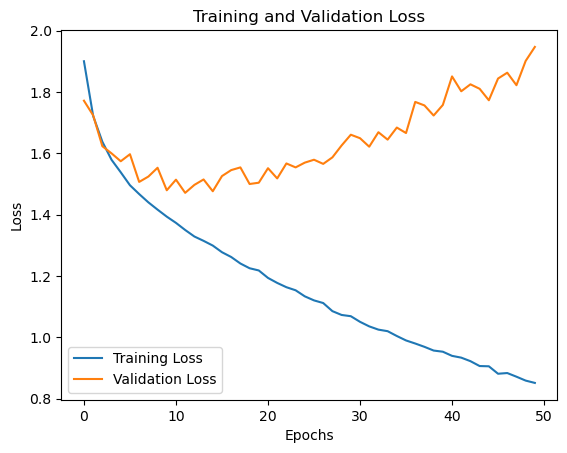

In [22]:
'''
Look at how the validation loss is increasing as the training loss goes down. This shows clear overfitting.
To mitigate overfitting, look at Improving on FFNNs-2.ipynb
Things like dropout can help with overfitting, which removes some of the connections randomly.
'''
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

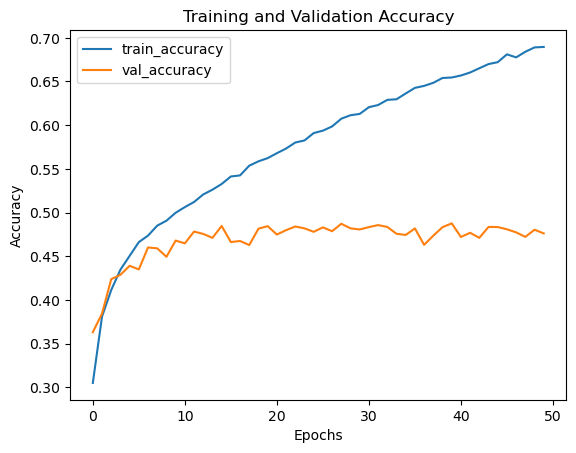

In [23]:
# Seeing the validation accurasy stagnating while the training accuracy increases also shows overfitting.
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Terrible test accuracy!
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

313/313 - 1s - loss: 1.9085 - accuracy: 0.4776 - 716ms/epoch - 2ms/step
